Diana Claudia Maya Santes \
2085383\
Procesamiento y clasificacion de Datos\
Maestría en Ciencia de Datos

In [1]:
#vgg16 model
from keras.applications.vgg16 import VGG16
# load model
model = VGG16()
# summarize the model
model.summary()

553476096/553467096 [==============================] - 7s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [2]:
#inception v3 model
from keras.applications.inception_v3 import InceptionV3
# load model
model = InceptionV3()
# summarize the model
model.summary()

96124928/96112376 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)           

In [3]:
from keras.applications.resnet import ResNet50
# load model
model = ResNet50()
# summarize the model
model.summary()

102981632/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [4]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import utils as np_utils
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, ZeroPadding2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score

In [5]:
# For training set only
import glob
muscovite = glob.glob('/content/drive/MyDrive/Colab Notebooks/tranferlearning/data/muscovite/*.*')
pyrite = glob.glob('/content/drive/MyDrive/Colab Notebooks/tranferlearning/data/pyrite/*.*')
quartz = glob.glob('/content/drive/MyDrive/Colab Notebooks/tranferlearning/data/quartz/*.*')

data = []
labels = []
for i in muscovite:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('muscovite')
for i in pyrite:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('pyrite')
for i in quartz:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('quartz')



In [2]:
from PIL import Image, ImageFilter

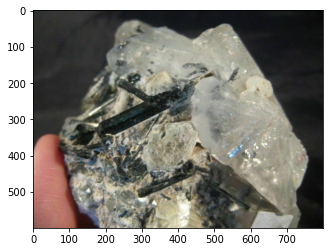

In [9]:
with Image.open(quartz[1]) as img:
    img.load()

type(img)
    
isinstance(img, Image.Image)

img= np.array(img)
imgplot = plt.imshow(img)
plt.show()

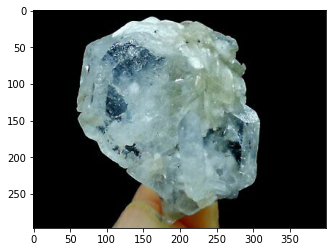

In [10]:
with Image.open(muscovite[1]) as img:
    img.load()

type(img)
    
isinstance(img, Image.Image)

img= np.array(img)
imgplot = plt.imshow(img)
plt.show()

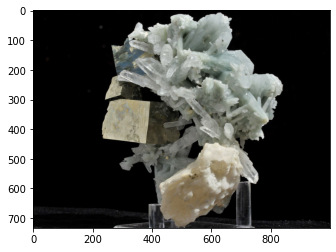

In [11]:
with Image.open(pyrite[1]) as img:
    img.load()

type(img)
    
isinstance(img, Image.Image)

img= np.array(img)
imgplot = plt.imshow(img)
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=0.7, shuffle=True)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

## Modelo VGG16

In [8]:
from keras.applications.vgg16 import VGG16
vgg_model = VGG16(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

for layer in vgg_model.layers:
  layer.trainable = False
# Make sure you have frozen the correct layers
for i, layer in enumerate(vgg_model.layers):
    print(i, layer.name, layer.trainable)

58900480/58889256 [==============================] - 0s 0us/step
0 input_4 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


In [9]:
x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(3, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)

In [10]:
learning_rate= 5e-5
transfer_model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=learning_rate), metrics=["accuracy"])
history = transfer_model.fit(X_train, y_train, batch_size = 1, epochs=5, validation_data=(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
1830/1830 [==============================] - 1315s 718ms/step - loss: 0.6824 - accuracy: 0.7213 - val_loss: 0.4320 - val_accuracy: 0.8140
Epoch 2/5
1830/1830 [==============================] - 1304s 713ms/step - loss: 0.3163 - accuracy: 0.8765 - val_loss: 0.3033 - val_accuracy: 0.9057
Epoch 3/5
1830/1830 [==============================] - 1306s 714ms/step - loss: 0.1771 - accuracy: 0.9410 - val_loss: 0.3033 - val_accuracy: 0.9146
Epoch 4/5
1830/1830 [==============================] - 1301s 711ms/step - loss: 0.1211 - accuracy: 0.9612 - val_loss: 0.2307 - val_accuracy: 0.9287
Epoch 5/5
1830/1830 [==============================] - 1290s 705ms/step - loss: 0.0968 - accuracy: 0.9689 - val_loss: 0.2520 - val_accuracy: 0.9312


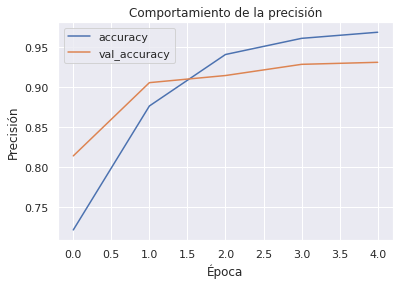

In [17]:
sns.set(rc = {'figure.figsize':(6,4)})
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Comportamiento de la precisión")
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.show()

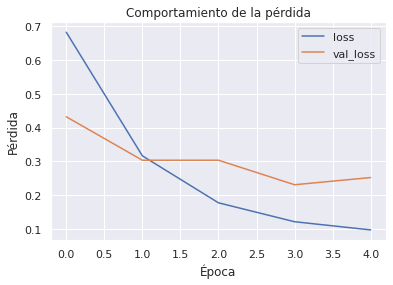

In [18]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title("Loss")
plt.title("Comportamiento de la pérdida")
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()

In [19]:
prediction = transfer_model.predict(X_test)

Matriz de confusion:


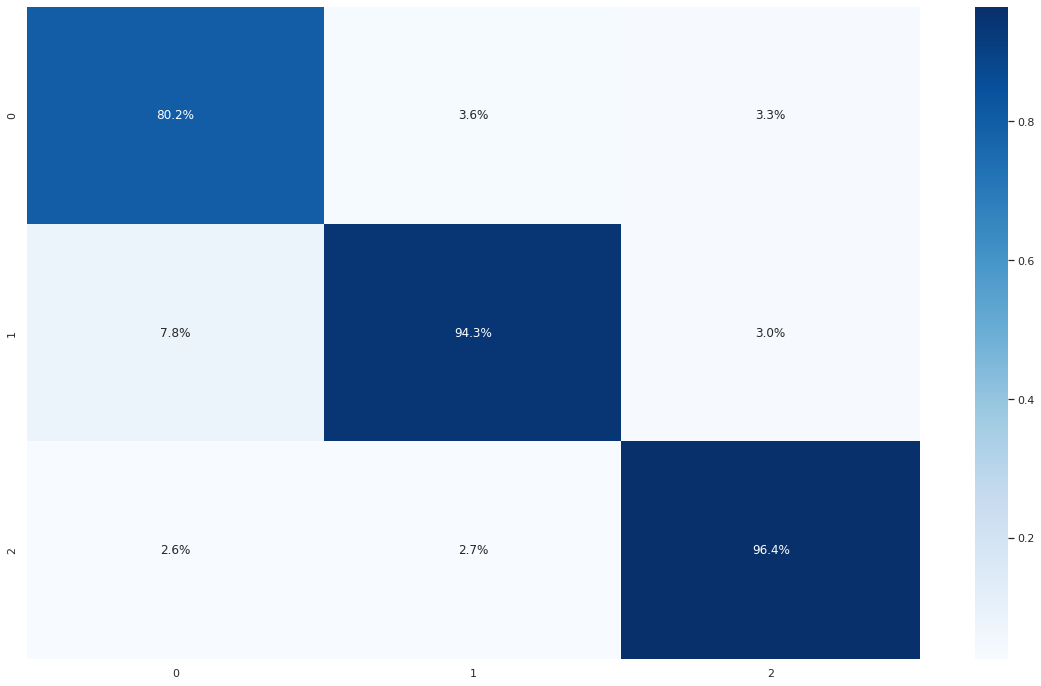

In [28]:
from numpy import argmax
#predictions= model.predict(X_test)
y_pred=[]
for i in range(len(prediction)):
    y_pred.append(argmax(prediction[i]))

y_ref= np.argmax(y_test, axis= 1)
print('Matriz de confusion:')
cm= confusion_matrix(y_ref,  y_pred)
sns.set(rc = {'figure.figsize':(20,12)})
sns.heatmap(cm/np.sum(cm,axis=1), annot=True, fmt='.1%', cmap='Blues')
#fig, ax= plt.subplots(figsize=(15,15))
#ax.matshow(cm, cm)
#plt.title('Matriz de Confusión', fontsize= 20)
#plt.ylabel('Etiqueta verdadera', fontsize = 15)
#plt.xlabel('Etiquieta predicha', fontsize= 15)
#for(i,j), z in np.ndenumerate(cm):
#  ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

### Modelo inception

In [1]:
# from keras.applications import inception_v3
from keras.applications.inception_v3 import InceptionV3,preprocess_input
from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

inception_model = InceptionV3(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

for layer in inception_model.layers:
  layer.trainable = False
# Make sure you have frozen the correct layers
for i, layer in enumerate(inception_model.layers):
  print(i, layer.name, layer.trainable)

87924736/87910968 [==============================] - 0s 0us/step
0 input_1 False
1 conv2d False
2 batch_normalization False
3 activation False
4 conv2d_1 False
5 batch_normalization_1 False
6 activation_1 False
7 conv2d_2 False
8 batch_normalization_2 False
9 activation_2 False
10 max_pooling2d False
11 conv2d_3 False
12 batch_normalization_3 False
13 activation_3 False
14 conv2d_4 False
15 batch_normalization_4 False
16 activation_4 False
17 max_pooling2d_1 False
18 conv2d_8 False
19 batch_normalization_8 False
20 activation_8 False
21 conv2d_6 False
22 conv2d_9 False
23 batch_normalization_6 False
24 batch_normalization_9 False
25 activation_6 False
26 activation_9 False
27 average_pooling2d False
28 conv2d_5 False
29 conv2d_7 False
30 conv2d_10 False
31 conv2d_11 False
32 batch_normalization_5 False
33 batch_normalization_7 False
34 batch_normalization_10 False
35 batch_normalization_11 False
36 activation_5 False
37 activation_7 False
38 activation_10 False
39 activation_11 False
4

In [10]:
x = inception_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(3, activation='softmax')(x) # Softmax for multiclass
transfer_model2 = Model(inputs=inception_model.input, outputs=x)

In [11]:
learning_rate= 5e-5
transfer_model2.compile(loss="categorical_crossentropy", optimizer=Adam(lr=learning_rate), metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [12]:
history2 = transfer_model2.fit(X_train, y_train, batch_size = 1, epochs=5, validation_data=(X_test,y_test))

Epoch 1/5
1830/1830 [==============================] - 585s 316ms/step - loss: 1.3464 - accuracy: 0.6464 - val_loss: 0.5308 - val_accuracy: 0.7873
Epoch 2/5
1830/1830 [==============================] - 594s 325ms/step - loss: 0.5817 - accuracy: 0.7918 - val_loss: 0.3806 - val_accuracy: 0.8561
Epoch 3/5
1830/1830 [==============================] - 586s 320ms/step - loss: 0.4955 - accuracy: 0.8350 - val_loss: 0.3896 - val_accuracy: 0.8815
Epoch 4/5
1830/1830 [==============================] - 558s 305ms/step - loss: 0.3719 - accuracy: 0.8585 - val_loss: 0.1943 - val_accuracy: 0.9274
Epoch 5/5
1830/1830 [==============================] - 563s 308ms/step - loss: 0.2988 - accuracy: 0.8989 - val_loss: 0.2393 - val_accuracy: 0.9223


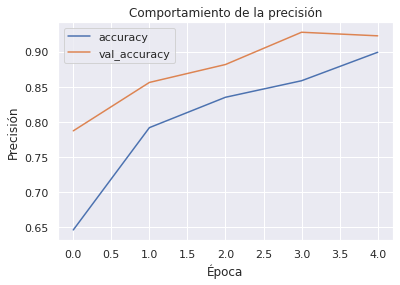

In [14]:
sns.set(rc = {'figure.figsize':(6,4)})
pd.DataFrame(history2.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Comportamiento de la precisión")
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.show()

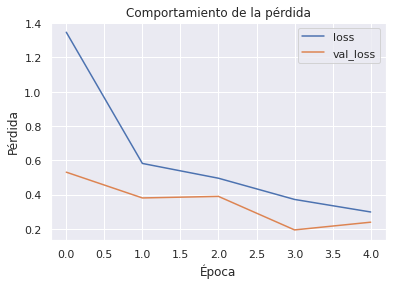

In [15]:
pd.DataFrame(history2.history)[['loss', 'val_loss']].plot()
plt.title("Loss")
plt.title("Comportamiento de la pérdida")
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()

In [16]:
prediction2 = transfer_model2.predict(X_test)

Matriz de confusion:


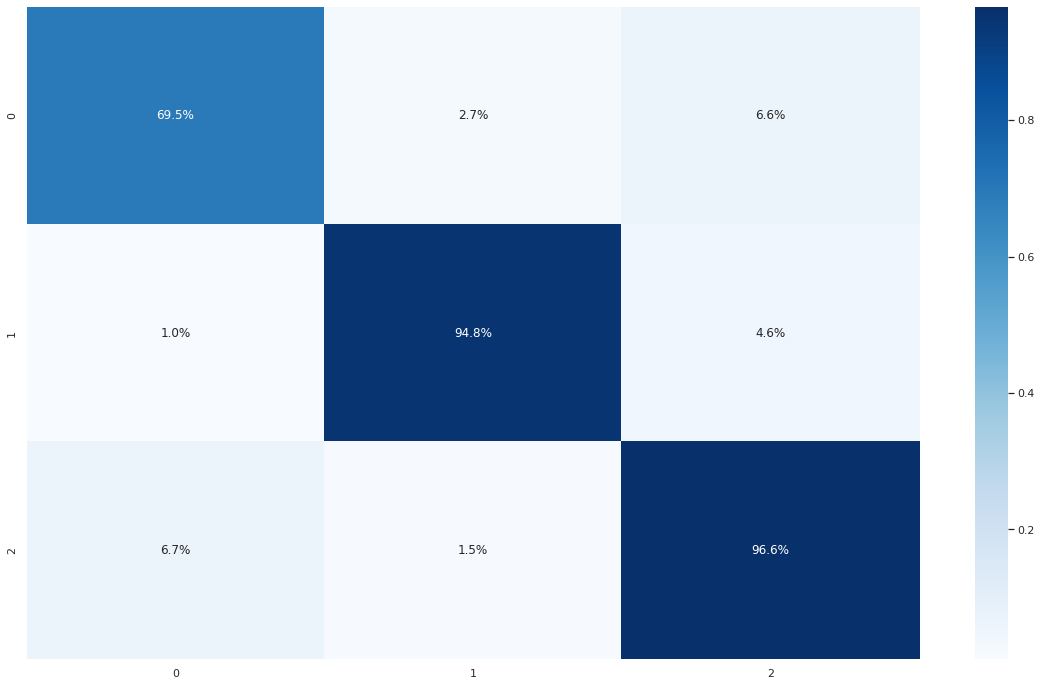

In [17]:
from numpy import argmax
#predictions= model.predict(X_test)
y_pred=[]
for i in range(len(prediction2)):
    y_pred.append(argmax(prediction2[i]))

y_ref= np.argmax(y_test, axis= 1)
print('Matriz de confusion:')
cm= confusion_matrix(y_ref,  y_pred)
sns.set(rc = {'figure.figsize':(20,12)})
sns.heatmap(cm/np.sum(cm,axis=1), annot=True, fmt='.1%', cmap='Blues')

# Conclusiones

Se realizó una clasificación de minerales, teniendo un dataset con 3 diferentes piedras, quarzo con 1185 imagenes, pyrite con 1086 imagenes y muscovite con 344 imágenes.

Se aplicaron dos modelos: el primero fue un VGG16 con tres capas adicionales en la última sección de fullyconected con función de activación softmax en la capa de salida ya que tenemos 3 clases.
Con 93% de accuracy, con los recultados nos podemos percatar que desde la segunda época la precisión comienza a estancarse y ya no aumenta, lo que podriamos intuir es que aún colocando más épocas esta no aumentaria mucho y tendríamos un sobre ajuste ya que en los datos de entramiento se desempeña muy bien pero con nuevos datos no.(tendríamos que agregar mas épocas para validar lo antes mencionado)

Para el modelo Inception con tres capas adicionales en la última sección de fullyconected con función de activación softmax en la capa de salida ya que tenemos 3 clases.  
Con 98% de accuracy, en este modelo podemos ver que con forme avanzan las epocas la precisión va en aumento y ambas lineas parecen acercarce cada vez mas lo que podriamos decir que si aumentamos las epocas el desempeño mejore un poco al menos.
Revisando la matriz de confusión le cuesta mucho trabajo identificar muscovite, una de las causas puede ser que contamos con muy pocas imagenes y es por ello que no logra identificar.

En conclusión el que mejor desempeño tuvo fue el Inception aunque creo que ajustado los parametros, disminuyendo el % de dropout y aumentando las epocas creo que puede mejorar su rendimiento.
